In [ ]:
Dataset For this code:

In [1]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotblib inline
import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%matplotblib` not found.


In [2]:
df=pd.read_csv('GlobalLandTemperaturesByState.csv')

In [3]:
df.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,0,1855-05-01,25.544,1.171,Acre,Brazil
1,1,1855-06-01,24.228,1.103,Acre,Brazil
2,2,1855-07-01,24.371,1.044,Acre,Brazil
3,3,1855-08-01,25.427,1.073,Acre,Brazil
4,4,1855-09-01,25.675,1.014,Acre,Brazil


In [4]:
df.dtypes

index                              int64
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [5]:
df.shape

(645121, 6)

In [6]:
df.isnull().sum()

index                                0
dt                                   1
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                1
Country                              1
dtype: int64

In [8]:
df.dropna(subset=['AverageTemperature','AverageTemperatureUncertainty'],inplace=True)

In [9]:
df.shape

(619473, 6)

In [10]:
df.dropna(subset=['dt','State',"Country"],inplace=True)

In [11]:
df.shape

(619473, 6)

In [12]:
df.isnull().sum()

index                            0
dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
dtype: int64

In [14]:
df.rename(columns={'dt':'Date',"AverageTemperature":'Avg_Temp',"AverageTemperatureUncertainty":"Confidence_interval_Temp"},inplace=True)

In [16]:
df.head()

,index,Date,Avg_Temp,Confidence_interval_Temp,State,Country
0,0,1855-05-01,25.544,1.171,Acre,Brazil
1,1,1855-06-01,24.228,1.103,Acre,Brazil
2,2,1855-07-01,24.371,1.044,Acre,Brazil
3,3,1855-08-01,25.427,1.073,Acre,Brazil
4,4,1855-09-01,25.675,1.014,Acre,Brazil


In [17]:
df["Date"]=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '1966-09-01', '1966-10-01', '1966-11-01', '1966-12-01',
               '1967-01-01', '1967-02-01', '1967-03-01', '1967-04-01',
               '1967-05-01', '1967-06-01'],
              dtype='datetime64[ns]', name='Date', length=619473, freq=None)

In [18]:
df.describe()

,index,Avg_Temp,Confidence_interval_Temp
count,619473.000000,619473.000000,619473.000000
mean,322558.961995,8.986033,1.288575
std,186517.694193,13.774243,1.360643
min,0.000000,-45.389000,0.036000
25%,160661.000000,-0.706000,0.316000
50%,321954.000000,11.193000,0.657000
75%,484889.000000,19.894000,1.852000
max,645119.000000,36.339000,12.646000


In [19]:
df['Year']=df.index.year
df.head()


,index,Avg_Temp,Confidence_interval_Temp,State,Country,Year
Date,,,,,,
1855-05-01,0,25.544,1.171,Acre,Brazil,1855
1855-06-01,1,24.228,1.103,Acre,Brazil,1855
1855-07-01,2,24.371,1.044,Acre,Brazil,1855
1855-08-01,3,25.427,1.073,Acre,Brazil,1855
1855-09-01,4,25.675,1.014,Acre,Brazil,1855


In [20]:
df.describe()

,index,Avg_Temp,Confidence_interval_Temp,Year
count,619473.000000,619473.000000,619473.000000,619473.000000
mean,322558.961995,8.986033,1.288575,1902.253122
std,186517.694193,13.774243,1.360643,67.809742
min,0.000000,-45.389000,0.036000,1743.000000
25%,160661.000000,-0.706000,0.316000,1851.000000
50%,321954.000000,11.193000,0.657000,1906.000000
75%,484889.000000,19.894000,1.852000,1959.000000
max,645119.000000,36.339000,12.646000,2013.000000


In [21]:
latest_df=df.loc['1980':'2013']
latest_df.head()

,index,Avg_Temp,Confidence_interval_Temp,State,Country,Year
Date,,,,,,
1980-01-01,1496,26.652,0.190,Acre,Brazil,1980
1980-02-01,1497,26.495,0.495,Acre,Brazil,1980
1980-03-01,1498,26.270,0.236,Acre,Brazil,1980
1980-04-01,1499,26.430,0.201,Acre,Brazil,1980
1980-05-01,1500,25.802,0.882,Acre,Brazil,1980


In [22]:
latest_df[['Country','Avg_Temp']].groupby(['Country']).mean().sort_values('Avg_Temp')

,Avg_Temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,11.988386
Australia,18.447621
India,22.871669
Brazil,24.537580


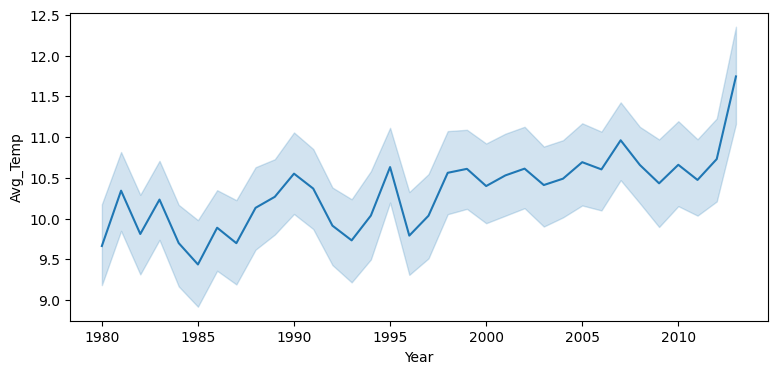

In [23]:
plt.figure(figsize=(9,4))
sns.lineplot(x='Year',y="Avg_Temp",data=latest_df)
plt.show()

In [25]:
resample_df=latest_df[['Avg_Temp']].resample('A').mean()

In [26]:
resample_df.head()

,Avg_Temp
Date,
1980-12-31,9.662645
1981-12-31,10.342096
1982-12-31,9.810138
1983-12-31,10.232787
1984-12-31,9.698466


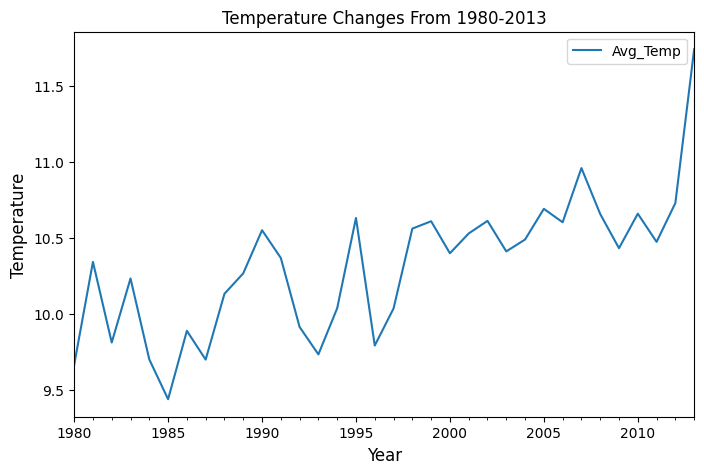

In [27]:
resample_df.plot(title='Temperature Changes From 1980-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

In [29]:
from statsmodels.tsa.stattools import adfuller

print("Dickey Fuller Test Results: ")
test_df=adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number Of Observation Used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s) ' %key]=value
print(df_output)

Dickey Fuller Test Results: 
Test Statistic                -0.726441
p-value                        0.839781
Lags Used                      2.000000
Number Of Observation Used    31.000000
Critical Value (1%)           -3.661429
Critical Value (5%)           -2.960525
Critical Value (10%)          -2.619319
dtype: float64


In [31]:
decomp=seasonal_decompose(resample_df,period=3)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

<Figure size 600x500 with 0 Axes>

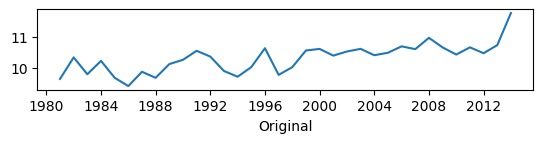

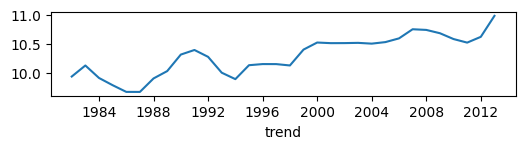

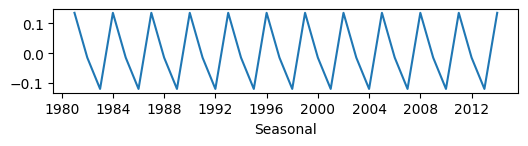

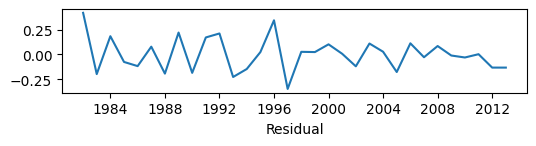

<Figure size 600x500 with 0 Axes>

In [32]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))


In [34]:
rol_mean=resample_df.rolling(window=3,center=True).mean()
ewm=resample_df.ewm(span=3).mean()

In [35]:
rol_std=resample_df.rolling(window=3,center=True).std()

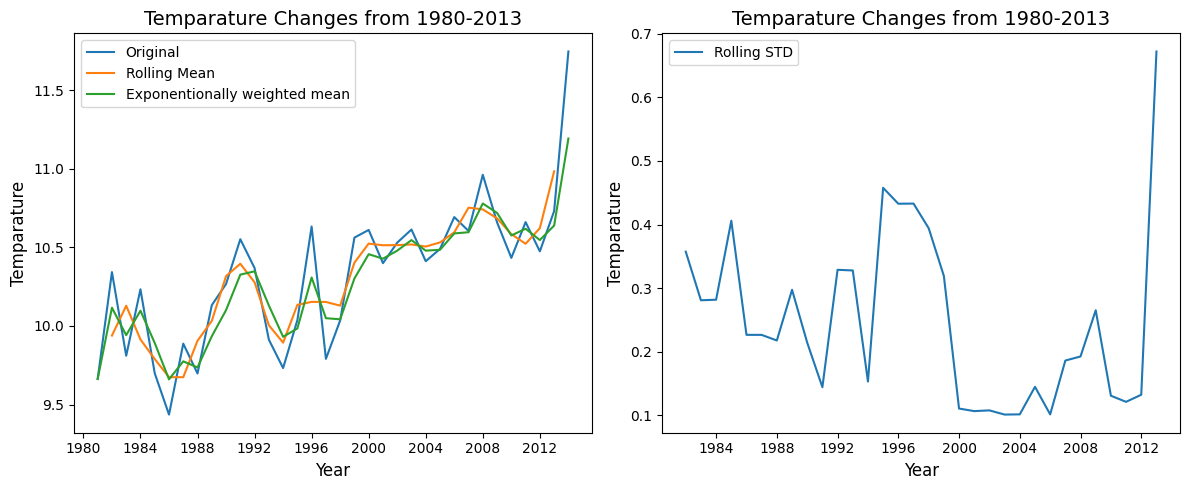

In [37]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label="Rolling Mean")
ax1.plot(ewm,label="Exponentionally weighted mean")
ax1.set_title('Temparature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temparature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(rol_std,label="Rolling STD")
ax2.set_title('Temparature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temparature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [39]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

print('Dickey-Fuller Test for Rolling Mean: ')
test_df=adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number Of Observation Used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s) ' %key]=value
print(df_output)
print(" ")
print('Dickey-Fuller Test for Expoenential Weighted Mean: ')
df_test=adfuller(ewm.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','Number Of Observation Used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s) ' %key]=value
print(df_output)

Dickey-Fuller Test for Rolling Mean: 
Test Statistic                -0.726441
p-value                        0.839781
Lags Used                      2.000000
Number Of Observation Used    31.000000
Critical Value (1%)           -3.661429
Critical Value (5%)           -2.960525
Critical Value (10%)          -2.619319
dtype: float64
 
Dickey-Fuller Test for Expoenential Weighted Mean: 
Test Statistic                -0.335867
p-value                        0.920269
Lags Used                      2.000000
Number Of Observation Used    31.000000
Critical Value (1%)           -3.661429
Critical Value (5%)           -2.960525
Critical Value (10%)          -2.619319
dtype: float64


In [40]:
diff_rol_mean=resample_df-rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_Temp
Date,
1981-12-31,0.403803
1982-12-31,-0.318202
1983-12-31,0.318990
1984-12-31,-0.090630
1985-12-31,-0.237862


In [41]:
diff_ewm=resample_df-ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,Avg_Temp
Date,
1980-12-31,0.000000
1981-12-31,0.226484
1982-12-31,-0.130917
1983-12-31,0.136141
1984-12-31,-0.192668


In [42]:
df_rol_mean_diff=diff_rol_mean.rolling(window=3,center=True).mean()

In [43]:
df_ewm_diff=diff_ewm.ewm(span=3).mean()

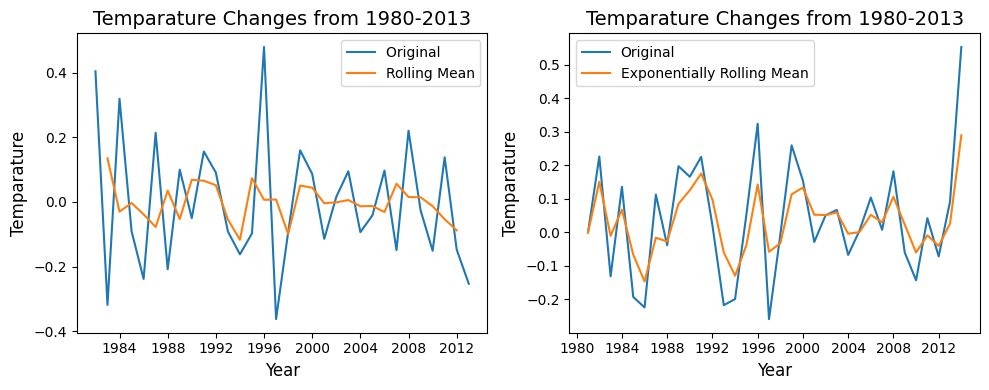

In [44]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
ax1.plot(diff_rol_mean,label="Original ")
ax1.plot(df_rol_mean_diff,label='Rolling Mean')
ax1.set_title('Temparature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temparature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(diff_ewm,label="Original")
ax2.plot(df_ewm_diff,label='Exponentially Rolling Mean')
ax2.set_title('Temparature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temparature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [52]:
print('Dickey-Fuller test for the difference between original and Rolling Mean:')
df_test=adfuller(diff_rol_mean.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','Number Of Observation Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s) ' %key]=value
print(df_output)
print(" ")
print('Dickey-Fuller test for the difference between original and Exponentially Weighted Mean:')
df_test=adfuller(diff_ewm.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','Number Of Observation Used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s) ' %key]=value
print(df_output)

Dickey-Fuller test for the difference between original and Rolling Mean:
Test Statistic               -7.016593e+00
p-value                       6.708078e-10
Lags Used                     1.000000e+00
Number Of Observation Used    3.000000e+01
Critical Value (1%)          -3.669920e+00
Critical Value (5%)          -2.964071e+00
Critical Value (10%)         -2.621171e+00
dtype: float64
 
Dickey-Fuller test for the difference between original and Exponentially Weighted Mean:
Test Statistic                -4.292074
p-value                        0.000458
Lags Used                      1.000000
Number Of Observation Used    32.000000
Critical Value (1%)           -3.661429
Critical Value (5%)           -2.960525
Critical Value (10%)          -2.619319
dtype: float64


In [49]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


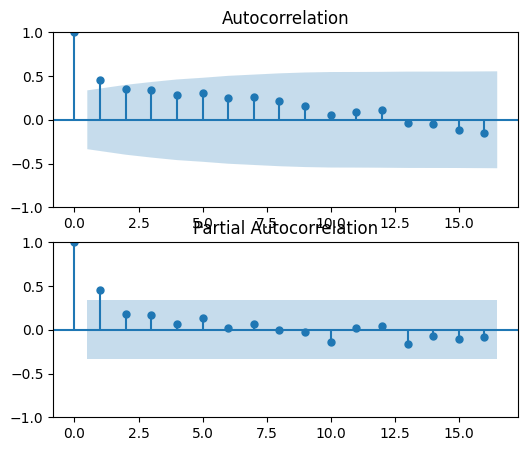

In [50]:
plt.figure(figsize=(6,5))
plt.subplot(211)
plot_acf(resample_df,ax=plt.gca())
plt.subplot(212)
plot_pacf(resample_df,ax=plt.gca())
plt.show()